In [30]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF
import scipy
import scipy.stats
from sklearn.linear_model import LinearRegression
%matplotlib inline

import plotly 
plotly.tools.set_credentials_file(username='dzldebby', api_key='WgKg4rOcNEdqQqKe3YVw')



#Condition 1 == Unpersonalised review, Condition 2 == Personalised Review 

df = pd.read_csv('RCT_Trust.csv')
df.head()

,Condition,User_ID,Time,Category,Gender,Age,Geography,Weight,Score,Response_Time
0,Impersonal,1042289417,7/7/17 0:36,Arts & Entertainment,Female,18-24,US-NORTHEAST-NY-New York,NaN,3,18841
1,Impersonal,1120370143,6/7/17 20:24,News,Male,35-44,US-SOUTH-DC-Washington,NaN,3,11200
2,Impersonal,1223171463,7/7/17 20:01,News,Female,18-24,US-NORTHEAST-MA-Taunton,NaN,3,58175
3,Impersonal,1274143080,7/7/17 12:54,News,Female,25-34,US-WEST-CO-Aspen,NaN,2,6311
4,Impersonal,1313061357,7/7/17 21:32,News,Male,35-44,US-MIDWEST-ND-Bismarck,NaN,3,22570


In [31]:
table = pd.pivot_table(df, values = 'Score', index = ['Condition', 'Gender'])
table

Condition   Gender
Impersonal  Female    2.466667
            Male      2.800000
Personal    Female    2.812500
            Male      3.714286
Name: Score, dtype: float64

In [32]:
#df['Gender'].value_counts()


In [70]:

data = df[df['Condition'] == "Impersonal"]
data1 = data['Score']

data3 = df[df['Condition'] == "Personal"]
data2 = data3['Score']

data3 = data3.rename(columns={'Response_Time': 'Response_Personal'})
data = data.rename(columns={'Response_Time': 'Response_Impersonal'})



In [72]:
df.groupby('Condition').mean()

,User_ID,Weight,Score,Response_Time
Condition,,,,
Impersonal,2.474463e+09,NaN,2.633333,17161.833333
Personal,1.069415e+09,NaN,3.233333,54065.400000


In [64]:
#histogram

x0 = data1
x1 = data2

trace1 = go.Histogram(
    x=x0,
    histnorm='count',
    name='Impersonal',
    marker=dict(
        color='#418cf4',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='Personalised',
    marker=dict(
        color='#f4c242'
    ),
    opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')



In [65]:
#two-sample t-test

twosample_results = scipy.stats.ttest_ind(data1, data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, file_id='twosample-table')


In [66]:
feature_cols = ['Response_Time']
X = df[feature_cols]
y = df['Score']


linreg = LinearRegression()
linreg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

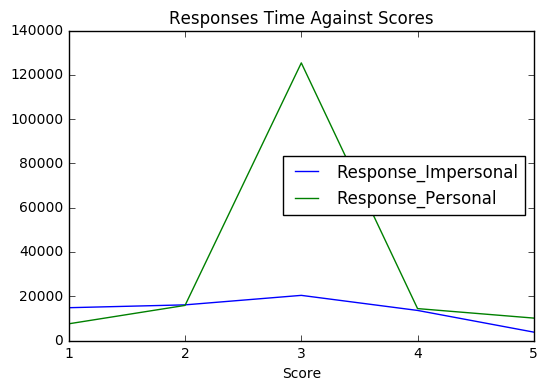

In [75]:
#graph of response time against scores. More details make it harder for people to reach a conclusion

data.groupby('Score').Response_Impersonal.mean().plot(xlim = (1, 5), xticks=(1,2,3,4,5), legend = "test", title = "Responses Time Against Scores")
data3.groupby('Score').Response_Personal.mean().plot(xlim = (1, 5), xticks=(1,2,3,4,5), legend = "test")


In [ ]:
#time vs social comparison 

In [84]:
time = pd.read_csv('time_vs_social.csv')

time.head()

,Condition,User ID,Time (UTC),Survey Completion,Publisher Category,Gender,Age,Geography,Weight,Question #1 Synonym Group,Price,Response_Time
0,Time,1125299670,9/7/17 22:45,Complete,News,Male,65+,US-MIDWEST-MO-Florissant,1.129179,39.5,39.5,80679
1,Time,1238570858,11/7/17 5:01,Complete,Other,Female,45-54,US-MIDWEST-ND-Mayville,1.273988,35.0,35.0,10827
2,Time,1426530800,9/7/17 20:07,Complete,News,Male,35-44,US-MIDWEST-MI-DeWitt,0.000008,35.0,35.0,32060
3,Time,472546757,10/7/17 1:02,Complete,News,Male,35-44,US-SOUTH-TN-Nashville,0.019379,30.0,30.0,22244
4,Time,575305722,9/7/17 4:43,Complete,News,Male,35-44,US-MIDWEST-IA-Jesup,0.000008,20.0,20.0,25568


In [86]:
time_data = time[time['Condition'] == "Time"]
time_data1 = time_data['Price']


time_data3 = time[time['Condition'] == "Social"]
time_data2 = time_data3['Price']


time_data3 = time_data3.rename(columns={'Response_Time': 'Response_Social'})
time_data = time_data.rename(columns={'Response_Time': 'Response_Time'})


In [82]:
time.groupby('Condition').mean()

,User ID,Weight,Question #1 Synonym Group,Price,Response Time #1 (ms)
Condition,,,,,
Social,1.378583e+09,0.9,25.849,25.849,33604.9
Time,7.504359e+08,0.9,32.450,32.450,37253.7


In [83]:
twosample_results = scipy.stats.ttest_ind(time_data1, time_data2)

matrix_twosample = [
    ['', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

twosample_table = FF.create_table(matrix_twosample, index=True)
py.iplot(twosample_table, file_id='twosample-table')


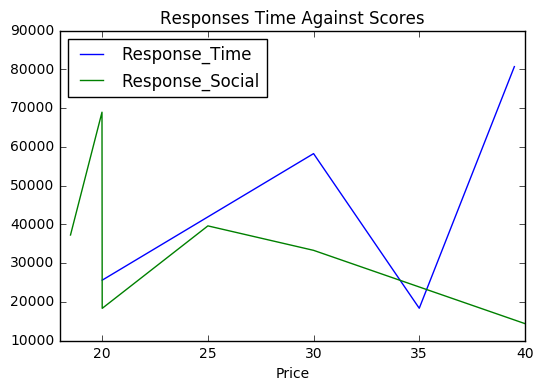

In [91]:
time_data.groupby('Price').Response_Time.mean().plot(xlim = (18, 40), legend = "test", title = "Responses Time Against Scores")
time_data3.groupby('Price').Response_Social.mean().plot(xlim = (18, 40), legend = "test")
